In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('SBER.csv')

In [5]:
df

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,10.01.2022,"290,40","297,15","298,88","289,65","42,96M","-1,20%"
1,06.01.2022,"293,92","286,60","295,10","281,00","79,38M","2,41%"
2,05.01.2022,"287,01","303,72","304,26","287,00","70,02M","-5,66%"
3,04.01.2022,"304,24","305,51","310,10","301,63","53,27M","-0,40%"
4,03.01.2022,"305,47","295,90","305,50","294,34","50,18M","4,08%"
...,...,...,...,...,...,...,...
270,16.12.2020,"278,35","278,00","280,84","276,14","54,75M","-0,13%"
271,15.12.2020,"278,70","278,53","283,76","276,07","84,19M","-0,45%"
272,14.12.2020,"279,95","285,01","287,74","277,10","90,42M","-1,33%"
273,11.12.2020,"283,73","282,50","284,60","279,78","76,10M","0,54%"


In [6]:
df = df[['Дата','Цена']]

In [7]:
df.columns = ['ds','y']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      275 non-null    object
 1   y       275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [9]:
df.head()

,ds,y
0,10.01.2022,"290,40"
1,06.01.2022,"293,92"
2,05.01.2022,"287,01"
3,04.01.2022,"304,24"
4,03.01.2022,"305,47"


In [10]:
df['y'] = df.y.str.replace(',','.')

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df['y'] = pd.to_numeric(df['y'])

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['ds'] = pd.to_datetime(df['ds'],dayfirst=True)

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.ds.min()

Timestamp('2020-12-10 00:00:00')

<AxesSubplot:>

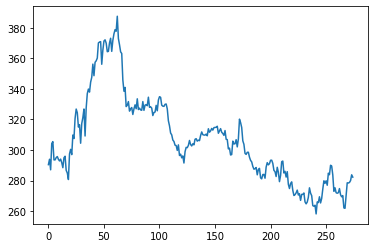

In [14]:
df.y.plot()

In [15]:
df.sort_values(by=['ds'],inplace=True)

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.tail()

,ds,y
4,2022-01-03,305.47
3,2022-01-04,304.24
2,2022-01-05,287.01
1,2022-01-06,293.92
0,2022-01-10,290.40


In [17]:
df.set_index('ds', inplace=True)
df.sort_index(inplace=True)
print('Монотонность - ',df.index.is_monotonic)

Монотонность -  True


In [18]:
df.head()

,y
ds,
2020-12-10,282.20
2020-12-11,283.73
2020-12-14,279.95
2020-12-15,278.70
2020-12-16,278.35


<AxesSubplot:xlabel='ds'>

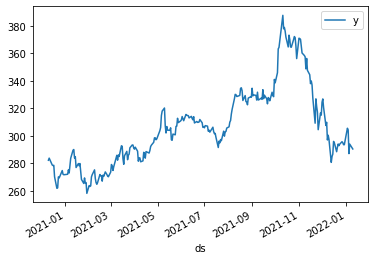

In [19]:
df.plot()

<AxesSubplot:xlabel='ds'>

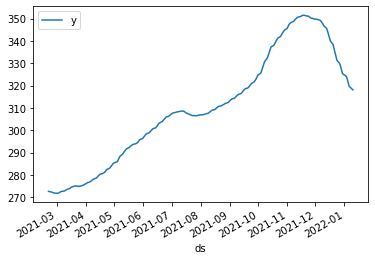

In [48]:
df.rolling(50).mean().plot()

In [49]:
df

,y
ds,
2020-12-10,282.20
2020-12-11,283.73
2020-12-14,279.95
2020-12-15,278.70
2020-12-16,278.35
...,...
2022-01-03,305.47
2022-01-04,304.24
2022-01-05,287.01


In [20]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [21]:
make_features(df, 7, 3)

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [22]:
df.head(6)

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2020-12-10,282.20,2020,12,10,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,283.73,2020,12,11,4,0,282.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,279.95,2020,12,14,0,0,283.73,282.20,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15,278.70,2020,12,15,1,0,279.95,283.73,282.20,NaN,NaN,NaN,NaN,281.960000
2020-12-16,278.35,2020,12,16,2,0,278.70,279.95,283.73,282.20,NaN,NaN,NaN,280.793333
2020-12-17,278.50,2020,12,17,3,0,278.35,278.70,279.95,283.73,282.2,NaN,NaN,279.000000


In [55]:
df.dropna(inplace=True)

In [56]:
df

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2020-12-21,261.79,2020,12,21,0,0,270.16,278.50,278.35,278.70,279.95,283.73,282.20,275.670000
2020-12-22,262.04,2020,12,22,1,0,261.79,270.16,278.50,278.35,278.70,279.95,283.73,270.150000
2020-12-23,270.10,2020,12,23,2,0,262.04,261.79,270.16,278.50,278.35,278.70,279.95,264.663333
2020-12-24,269.32,2020,12,24,3,0,270.10,262.04,261.79,270.16,278.50,278.35,278.70,264.643333
2020-12-25,270.64,2020,12,25,4,0,269.32,270.10,262.04,261.79,270.16,278.50,278.35,267.153333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-03,305.47,2022,1,3,0,0,293.49,293.51,295.00,295.68,293.89,292.80,294.00,294.000000
2022-01-04,304.24,2022,1,4,1,0,305.47,293.49,293.51,295.00,295.68,293.89,292.80,297.490000
2022-01-05,287.01,2022,1,5,2,0,304.24,305.47,293.49,293.51,295.00,295.68,293.89,301.066667


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
features = df.drop(['y'],axis = 1)
target = df['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (201, 13)
X_test (67, 13)


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [61]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [62]:
y_predicted_lr = model_lr.predict(X_test)

In [63]:
y_predicted_lr

array([345.36598222, 360.10194319, 362.24095254, 365.57494601,
       370.63507066, 382.91928672, 375.43068138, 374.05091919,
       372.83024095, 369.40241753, 362.81194429, 368.32218241,
       366.50087996, 360.65274982, 361.70589683, 366.35140653,
       368.45573503, 366.80489061, 361.69931943, 356.01114876,
       367.06140106, 367.96641457, 365.74282104, 358.83706172,
       356.48908327, 356.0484827 , 347.26326279, 352.68654997,
       347.73810911, 343.84799967, 338.33359108, 339.26092811,
       337.0403576 , 329.53528092, 313.69100576, 326.66734231,
       324.14905714, 318.85884909, 309.85788642, 318.69425474,
       320.77420744, 326.43369303, 329.50162589, 325.60662454,
       314.66639113, 314.6171092 , 304.38530582, 304.85116681,
       304.34267695, 289.78693724, 292.48565811, 294.31658258,
       301.68767393, 302.80754458, 296.73357477, 299.76513256,
       301.6828141 , 300.11719294, 301.80535211, 303.05971506,
       302.65190448, 300.78241249, 301.14331839, 310.91

In [64]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))


RMSE тестовой выборки LinearRegression:  8.98704277755883


In [65]:
df.tail()

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2022-01-03,305.47,2022,1,3,0,0,293.49,293.51,295.00,295.68,293.89,292.80,294.00,294.000000
2022-01-04,304.24,2022,1,4,1,0,305.47,293.49,293.51,295.00,295.68,293.89,292.80,297.490000
2022-01-05,287.01,2022,1,5,2,0,304.24,305.47,293.49,293.51,295.00,295.68,293.89,301.066667
2022-01-06,293.92,2022,1,6,3,0,287.01,304.24,305.47,293.49,293.51,295.00,295.68,298.906667
2022-01-10,290.40,2022,1,10,0,0,293.92,287.01,304.24,305.47,293.49,293.51,295.00,295.056667


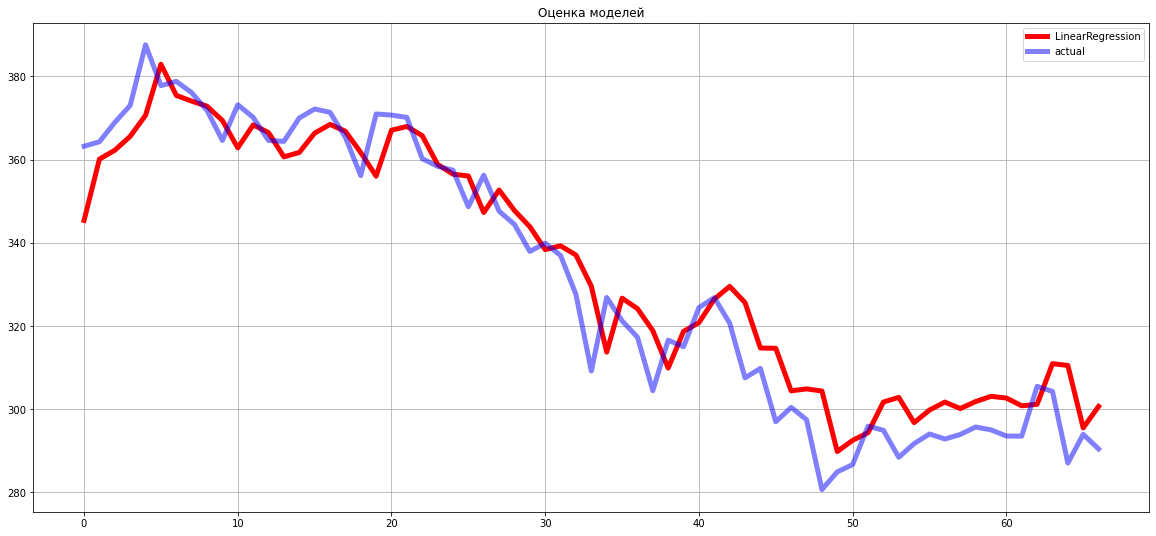

In [66]:
plt.figure(figsize=(20, 9))
plt.plot(y_predicted_lr, "r",linewidth=5, label="LinearRegression")
plt.plot(y_test.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

## Используем Facebok

In [1]:
# https://facebook.github.io/prophet/
from prophet import Prophet
m = Prophet()

/Users/18827990/DA_4/lec_venv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [23]:
df_prophet = df[['y']]

In [24]:
df_prophet

,y
ds,
2020-12-10,282.20
2020-12-11,283.73
2020-12-14,279.95
2020-12-15,278.70
2020-12-16,278.35
...,...
2022-01-03,305.47
2022-01-04,304.24
2022-01-05,287.01


In [25]:
df_prophet.reset_index(inplace=True)

In [26]:
df_prophet

,ds,y
0,2020-12-10,282.20
1,2020-12-11,283.73
2,2020-12-14,279.95
3,2020-12-15,278.70
4,2020-12-16,278.35
...,...,...
270,2022-01-03,305.47
271,2022-01-04,304.24
272,2022-01-05,287.01
273,2022-01-06,293.92


In [27]:
m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
277,2022-01-13
278,2022-01-14
279,2022-01-15
280,2022-01-16
281,2022-01-17


In [29]:
forecast = m.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-10,274.215204,262.785304,285.255395,274.215204,274.215204,0.136851,0.136851,0.136851,0.136851,0.136851,0.136851,0.0,0.0,0.0,274.352055
1,2020-12-11,274.174571,261.720330,285.326971,274.174571,274.174571,-0.837698,-0.837698,-0.837698,-0.837698,-0.837698,-0.837698,0.0,0.0,0.0,273.336873
2,2020-12-14,274.052672,262.862930,286.720780,274.052672,274.052672,0.585121,0.585121,0.585121,0.585121,0.585121,0.585121,0.0,0.0,0.0,274.637792
3,2020-12-15,274.012038,262.321989,286.273214,274.012038,274.012038,0.739274,0.739274,0.739274,0.739274,0.739274,0.739274,0.0,0.0,0.0,274.751313
4,2020-12-16,273.971405,262.838920,286.000977,273.971405,273.971405,0.049033,0.049033,0.049033,0.049033,0.049033,0.049033,0.0,0.0,0.0,274.020438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-01-13,273.721927,262.773760,285.301353,273.721927,273.722159,0.136851,0.136851,0.136851,0.136851,0.136851,0.136851,0.0,0.0,0.0,273.858778
278,2022-01-14,272.641629,261.156745,284.123146,272.627463,272.700826,-0.837698,-0.837698,-0.837698,-0.837698,-0.837698,-0.837698,0.0,0.0,0.0,271.803931
279,2022-01-15,271.561331,255.815531,278.884762,271.493897,271.696469,-4.012580,-4.012580,-4.012580,-4.012580,-4.012580,-4.012580,0.0,0.0,0.0,267.548751
280,2022-01-16,270.481033,262.526981,285.489385,270.355535,270.703655,3.340000,3.340000,3.340000,3.340000,3.340000,3.340000,0.0,0.0,0.0,273.821032


In [31]:


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
275,2022-01-11,276.621798,266.538898,287.611923
276,2022-01-12,274.851259,263.510228,286.162189
277,2022-01-13,273.858778,262.773760,285.301353
278,2022-01-14,271.803931,261.156745,284.123146
279,2022-01-15,267.548751,255.815531,278.884762
280,2022-01-16,273.821032,262.526981,285.489385
281,2022-01-17,269.985855,259.150600,281.505200


<AxesSubplot:>

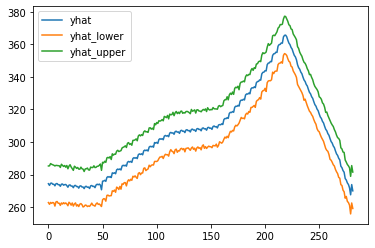

In [32]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot()

In [33]:
forecast.set_index('ds',inplace=True)

In [34]:
forecast['yhat'].tail(7)

ds
2022-01-11    276.621798
2022-01-12    274.851259
2022-01-13    273.858778
2022-01-14    271.803931
2022-01-15    267.548751
2022-01-16    273.821032
2022-01-17    269.985855
Name: yhat, dtype: float64

In [36]:
import matplotlib.pyplot as plt